In [1]:
import sys
ver_info = sys.version
print("This jupyter notebook was executed with:\n{0}".format(ver_info));


# exploring-dataset
+ we're gonna use seaborn to look through the data
+ going to try to derive meaningful equations for energy and dance (maybe a few for each) 

In [2]:
# IMPORTS 

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats, integrate
import seaborn as sns

import pprint
p = pprint.PrettyPrinter(indent=4)

import config as config

%matplotlib inline
%run utilities.py

Utilities object.


In [3]:
%run utilities.py
util = Utilities({}, use_json=False)
training_list, testing_list = util.get_datasets()

# turning the datasets into pandas DataFrames 
training_DF, testing_DF = util.create_dataframes(training_list, testing_list)

## meta-data features
+ the artist_x ones already have good correlation

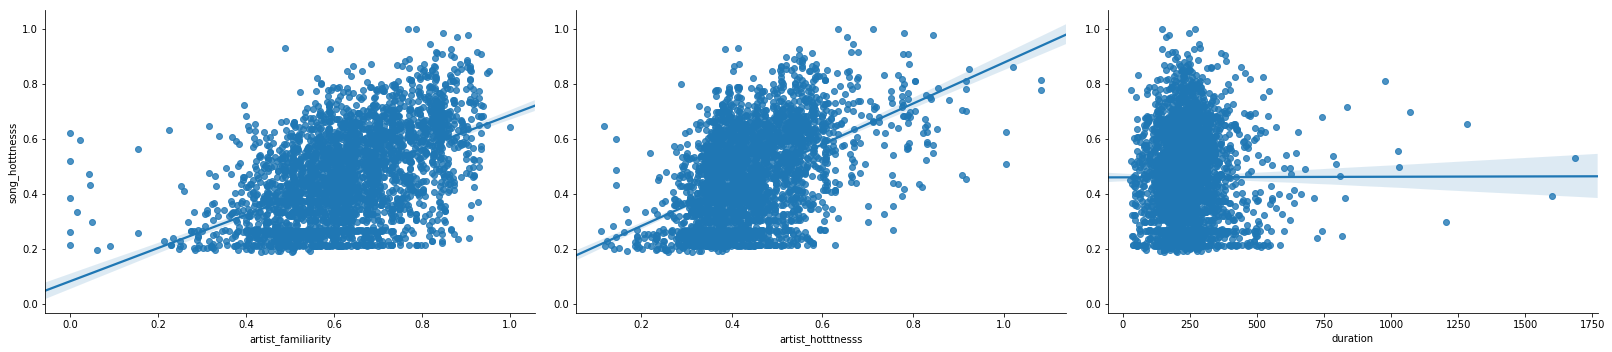

In [10]:
sns.pairplot(training_DF, x_vars=['artist_familiarity', 'artist_hotttnesss', 'duration'], 
             y_vars='song_hotttnesss', size=5, aspect=1.5, kind='reg')

## acoustic features
+ these suck

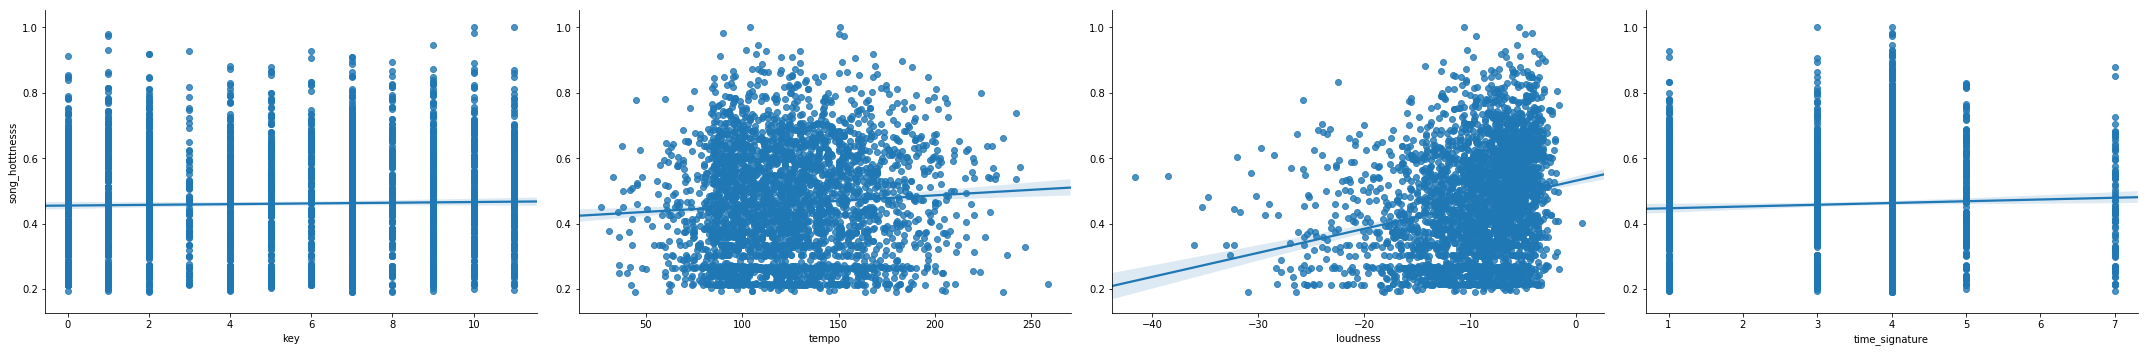

In [18]:
# The raw acoustic features 
sns.pairplot(training_DF, x_vars=['key', 'tempo', 'loudness', 'time_signature'], 
             y_vars='song_hotttnesss', size=5, aspect=1.5, kind='reg')

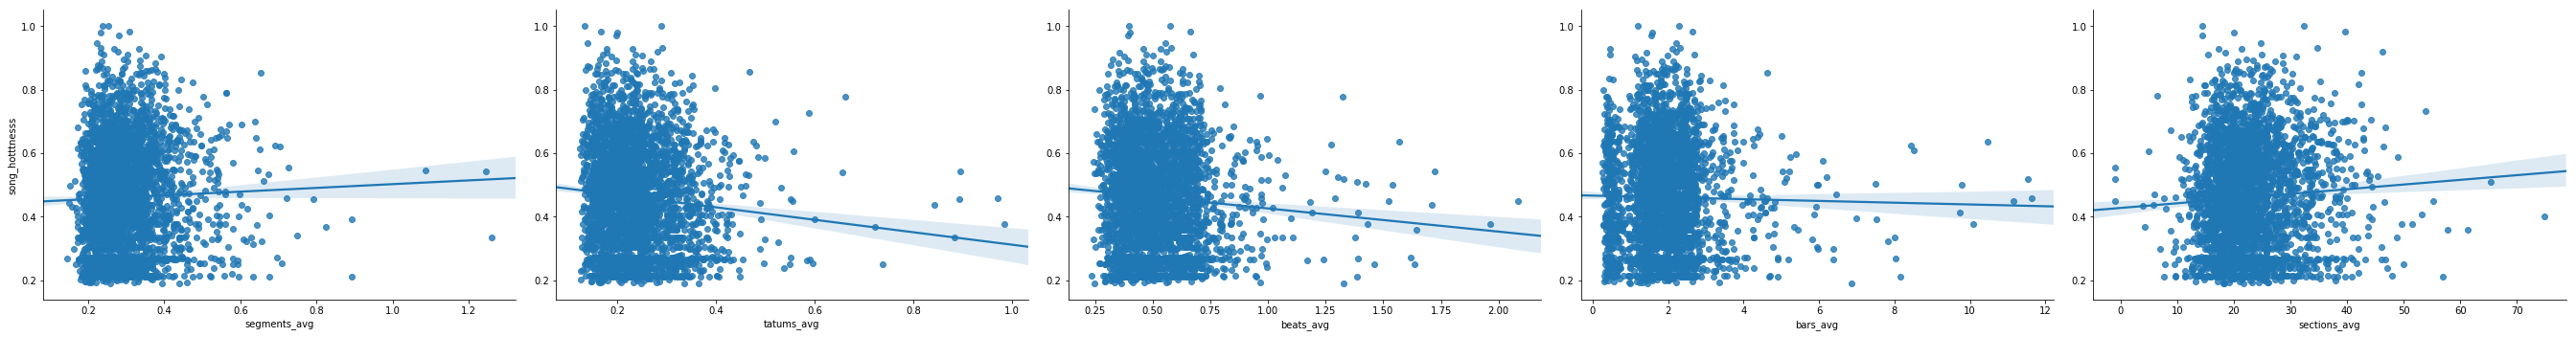

In [19]:
# all the interval averages
sns.pairplot(training_DF, x_vars=['segments_avg', 'tatums_avg', 'beats_avg', 'bars_avg', 'sections_avg'], 
             y_vars='song_hotttnesss', size=5, aspect=1.5, kind='reg')

## Making a derived feature: ENERGY
`energy`:  The feature mix we use to compute energy includes loudness and segment durations.


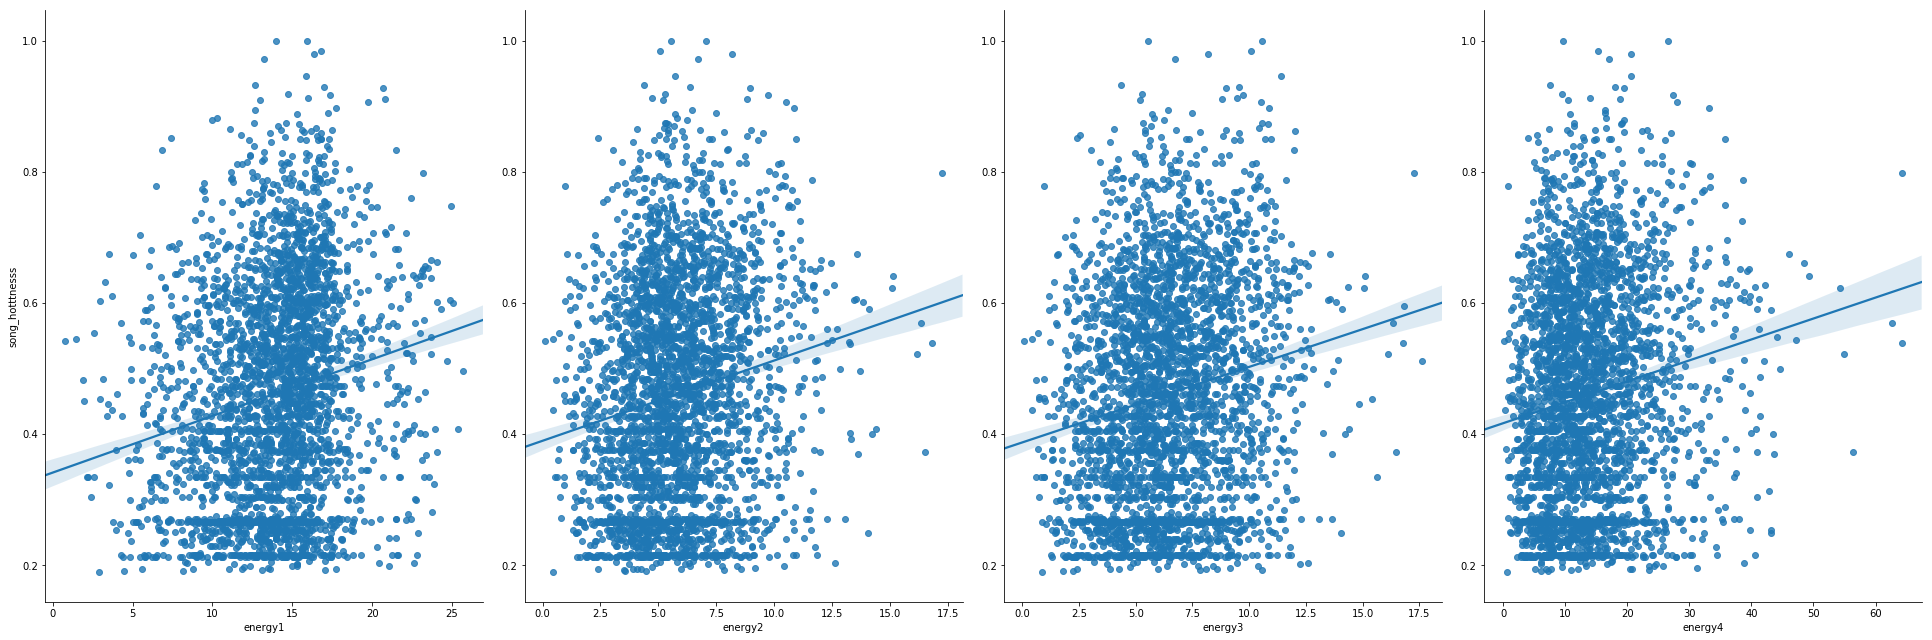

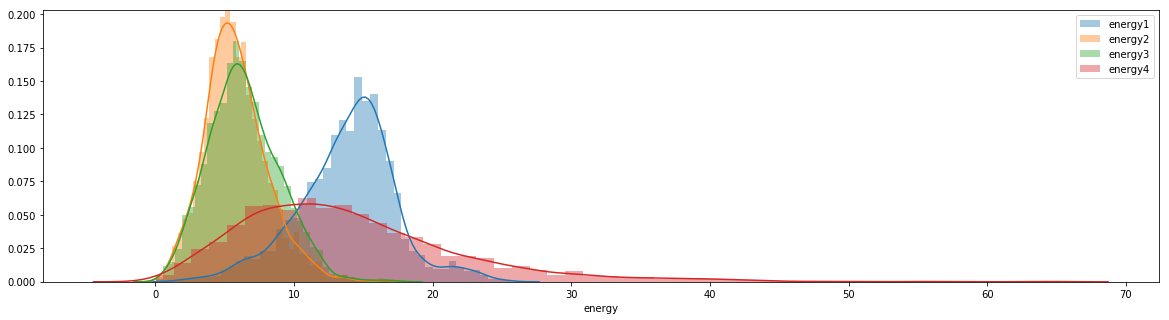

In [7]:
%run utilities.py
util = Utilities({}, use_json=False)

# loudness = training_DF['loudness']
# tempo = training_DF['tempo']
# time_sig = training_DF['time_signature']
# sections_avg = training_DF['sections_avg']
# beats_avg = training_DF['beats_avg']
# tatums_avg = training_DF['tatums_avg']
# training_DF['energy1'] = (50+loudness)**2*(12-time_sig)/1000
# training_DF['energy2'] = (50+loudness)**2*(12-time_sig)/(5000*beats_avg)
# training_DF['energy3'] = (50+loudness)**2*(12-time_sig)/(10000*tatums_avg)
# training_DF['energy4'] = (50+loudness)**2*(12-time_sig)/(50000*tatums_avg*beats_avg)

training_DF, testing_DF = util.generate_energy_measure(training_DF, testing_DF)

sns.pairplot(training_DF, x_vars=['energy1', 'energy2', 'energy3', 'energy4'], 
# sns.pairplot(training_DF, x_vars=['energy'], 
    y_vars='song_hotttnesss', size=9, aspect=.75, kind='reg')

# Trying to figure out which energy is better to use... 
plt.subplots(figsize=(20,5))

energy = sns.distplot(training_DF['energy1'], label='energy1', )
energy = sns.distplot(training_DF['energy2'],  label='energy2')
energy = sns.distplot(training_DF['energy3'],  label='energy3')
energy = sns.distplot(training_DF['energy4'],  label='energy4', axlabel='energy')

energy.legend()

## Making a derived feature: DANCE
`danceability`: We use a mix of features to compute danceability, including beat strength, tempo stability, overall tempo, and more.

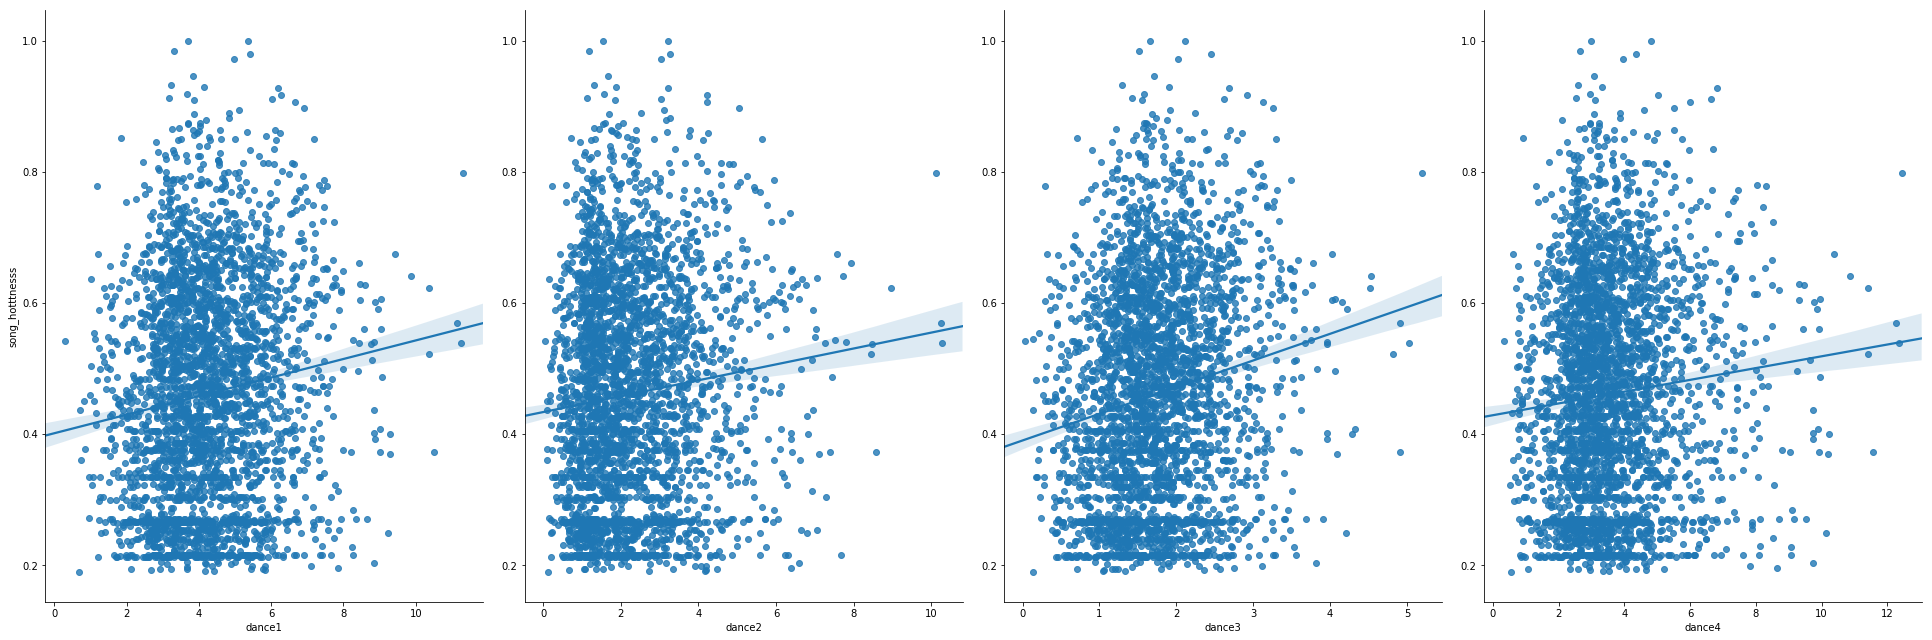

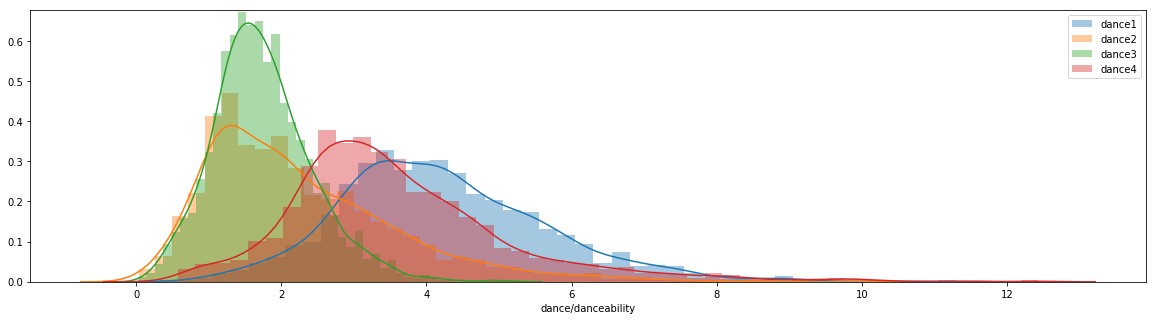

In [22]:
# loudness = training_DF['loudness']
# tempo = training_DF['tempo']
# time_sig = training_DF['time_signature']
# key = training_DF['key']
# sections_avg = training_DF['sections_avg']
# beats_avg = training_DF['beats_avg']
# tatums_avg = training_DF['tatums_avg']


# training_DF['dance1'] = (12-time_sig)*(tempo)*(50+loudness)/10000
# training_DF['dance2'] = (12-time_sig)*(tempo)**2*(50+loudness)/(2500000)
# training_DF['dance3'] = (12-time_sig)*(tempo)*(50+loudness)**2/(1000000)
# training_DF['dance4'] = (12-time_sig)**2*(tempo)*(50+loudness)/(100000)


%run utilities.py
util = Utilities({}, use_json=False)

training_DF, testing_DF = util.generate_dance_measure(training_DF, testing_DF)

sns.pairplot(training_DF, x_vars=['dance1', 'dance2', 'dance3', 'dance4'], 
# sns.pairplot(training_DF, x_vars=['energy'], 
    y_vars='song_hotttnesss', size=9, aspect=.75,  kind='reg')

# Trying to figure out which energy is better to use... 
plt.subplots(figsize=(20,5))

dance = sns.distplot(training_DF['dance1'], label='dance1', )
dance = sns.distplot(training_DF['dance2'],  label='dance2')
dance = sns.distplot(training_DF['dance3'],  label='dance3')
dance = sns.distplot(training_DF['dance4'],  label='dance4', axlabel='dance/danceability')

dance.legend()